Unsupervised Learning is where the target variable is unknown. Hence, I am using this country dataset to employ clustering through the k-means method.

# Step 1: Importing and Cleaning Data

In [40]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [43]:
df = pd.read_csv("/content/gdrive/MyDrive/441_Lecture_9/Country-data.csv", sep = ",")

In [44]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [46]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [47]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Step 2: Fitting a KMeans Model with Three Clusters

In [48]:
kmeans = KMeans(n_clusters= 3
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Step 3: Visualisation Using Income and Total Fertility

In [49]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

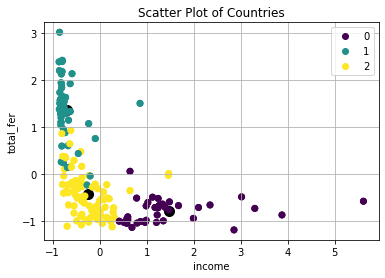

In [51]:
x1_index = 4
x2_index = 7

# Plot the scatter plot with clusters
plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

# Add legends for the different clusters
plt.legend(handles=plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis').legend_elements()[0], labels=list(set(kmeans.labels_)))

# Set the axis labels and title
plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Countries')

# Show the plot
plt.grid()
plt.show()


# Step 4: Using Elbow Method Visualisation

In [52]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters = k , n_init = 30)
  kmeans.fit(X_scaled, )
  WCSSs.append(kmeans.inertia_)

# Step 5: Fitting the model on three clusters based on income

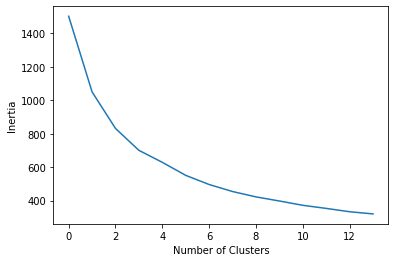

In [53]:
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Since income might be feature which would be able to distinguish countries from one another on the same baselines and allow us to compare the other features based on this, I am choosing 3 clusters in order to segment them in three categories - low income, average income, and high income.

In [79]:
k = 3

In [80]:
kmeans = KMeans(n_clusters = k).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Step 6: Creating a list of the countries that are in each cluster

In [81]:
prediction = pd.DataFrame(kmeans.predict(X_scaled))

In [82]:
upd_df = pd.concat([prediction, names], axis = 1)

In [89]:
for i in range(3):
    print("Cluster", i, ":")
    print(list(upd_df[upd_df[0] == i]["country"]))


Cluster 0 :
['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 1 :
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Li

From the above lists, it is interesting to see that the segmentation of the countries matches my intuition of categorization as low income, median income, and high income. In Cluster 0, I can see countries such as Germany, France, Japan, Qatar, United Kingdom, and United States are present which are on average deemed as countries which have higher incomes. In Cluster 1, countries such as Costa Rica, Hungary, and Turkey amongst others are listed which in general are relatively median income as compared to Cluster 2 which has countries such as  Ghana, Afghanistan, and Uganda - low income countries.

# Step 7: Creating a table of Descriptive Statistics. 

Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Using the nonscaled X values for interprotation

In [84]:
upd_df.describe()

,0
count,167.000000
mean,1.065868
std,0.704014
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [85]:
comp_df = pd.concat([prediction,X], axis = 1)

In [86]:
comp_df

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,2,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,1,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,2,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [87]:
comp_df.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


In [88]:
comp_df.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,2.188933,41.930782,3.178015,36.843998,20852.017526,4.077719,1.815742,0.373054,18991.079777
1,13.757919,19.029182,2.167233,20.103873,8180.073696,7.849516,3.960745,0.696957,5021.434052
2,33.375229,18.160597,2.662015,17.732741,5641.790360,15.509958,6.443521,1.041382,2956.103925


# Step 8: An interesting observation about the descriptive statistics

The way that my clusters got divided was contingent on income, group 1 is high income countries, group 2 is median incomes, and group 3 is low income. Hence, one of the x variables which I referred to for the visualization - total fertility - has a direct relationship with income. This implies that as the average income of a group of countries rises, the total fertility rate of that group also rises. This is intuitive as in poorer countries, there is a norm of having larger family sizes since they associate a larger number of children to a larger sources of future income for the parents. Similarly, richer countries having lower total fertility is also intuitive as with a better standard of living, people have access to better health and family planning resources hence leading to smaller family sizes.